In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip list

Package                      Version


---------------------------- -----------
absl-py                      2.3.0
asttokens                    3.0.0
astunparse                   1.6.3
cachetools                   5.5.2
certifi                      2025.4.26
charset-normalizer           3.4.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
exceptiongroup               1.3.0
executing                    2.2.0
flatbuffers                  25.2.10
fonttools                    4.58.1
gast                         0.4.0
google-auth                  2.40.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.71.0
h5py                         3.13.0
idna                         3.10
ipykernel                    6.29.5
ipython                      8.36.0
jax                          0.4.30
jaxlib                       0.4.3

In [29]:

import tensorflow as tf
import os

In [30]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
tf.config.list_physical_devices('GPU')

[]

In [129]:
import os
import zipfile
import cv2
import imghdr

data_dir = 'data'
image_exts = ['jpeg', 'png', 'jpg', 'bmp', 'webp']  # your allowed extensions

# Step 1: Extract zip files in data_dir if not extracted yet
for item in os.listdir(data_dir):
    if item.endswith('.zip'):
        zip_path = os.path.join(data_dir, item)
        extract_folder = os.path.join(data_dir, os.path.splitext(item)[0])
        if not os.path.exists(extract_folder):
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_folder)

# Step 2: Now your existing logic to loop through folders and images
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # make sure it's a folder (skip zip files)
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                # os.remove(image_path)  # keep commented if you want

In [39]:

import numpy as np
from matplotlib import pyplot as plt

In [41]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 66 files belonging to 2 classes.


In [42]:

data_iterator = data.as_numpy_iterator()

In [43]:
batch = data_iterator.next()

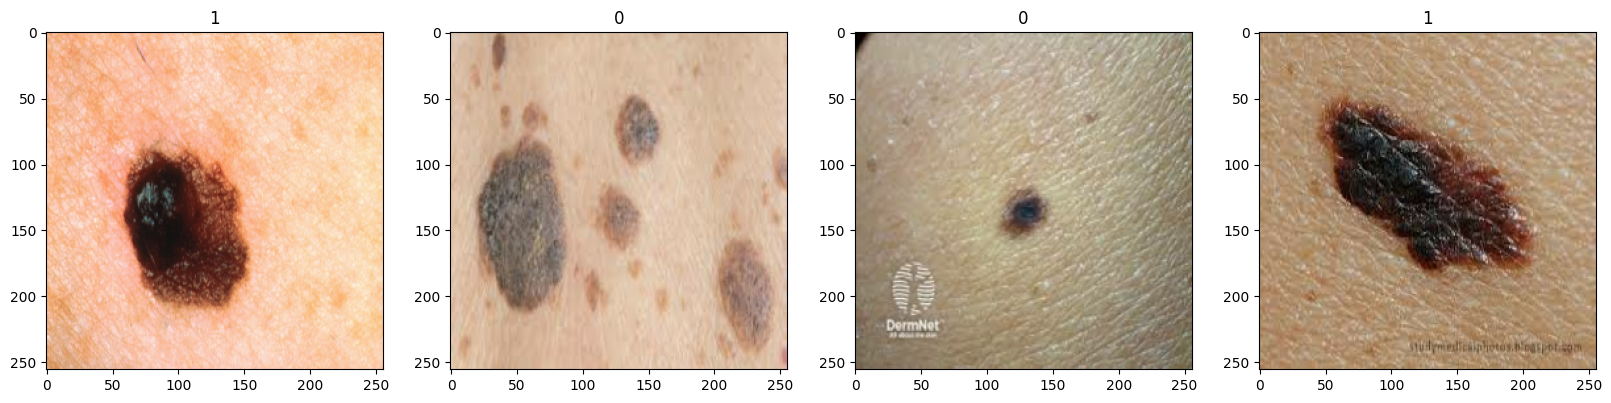

In [44]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [137]:
#Scaling the data

In [45]:
data_dir = 'data'



In [46]:
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=(256, 256),
    batch_size=32
)

data = data.map(lambda x, y: (x / 255.0, y))

Found 66 files belonging to 2 classes.


In [47]:

data.as_numpy_iterator().next() #converts the tensorflow dataset to a numpy iterator and fetches the next batch.Used to check the output after preprocessing, to make sure its scaled between 0 and 1.

(array([[[[0.45210487, 0.43249702, 0.42073232],
          [0.45125613, 0.43164828, 0.41988358],
          [0.4493724 , 0.42976457, 0.41799986],
          ...,
          [0.3670415 , 0.21557091, 0.1725246 ],
          [0.3581835 , 0.21700703, 0.1699482 ],
          [0.34407935, 0.21025582, 0.163197  ]],
 
         [[0.4637791 , 0.44417125, 0.43240654],
          [0.4627987 , 0.44319087, 0.43142617],
          [0.45912224, 0.4395144 , 0.4277497 ],
          ...,
          [0.28561103, 0.13659142, 0.1012973 ],
          [0.25011584, 0.11086138, 0.07361941],
          [0.19213963, 0.0588063 , 0.02648303]],
 
         [[0.4647212 , 0.44511336, 0.43334866],
          [0.45981923, 0.4402114 , 0.42844668],
          [0.45551997, 0.43591213, 0.42414743],
          ...,
          [0.19755332, 0.05245529, 0.02108274],
          [0.1678213 , 0.03110591, 0.00611213],
          [0.1701507 , 0.04073893, 0.0134421 ]],
 
         ...,
 
         [[0.9556373 , 0.9007353 , 0.8654412 ],
          [0.93161

In [102]:
# 3. Split data into train and validation sets
dataset_size = len(data)
train_size = int(dataset_size * 0.7)
val_size =  dataset_size - train_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)



In [103]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # type: ignore

In [104]:
model = Sequential()

In [105]:
#Conv2D-scans with 16 kernels of size 3x3, strides of 1, and ReLU activation function
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [106]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [107]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [108]:
model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [109]:
#Training the model

In [110]:

logdir='logs'

In [111]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [112]:
# 7. Train the model
hist = model.fit(
    train,
    epochs=20,
    validation_data=val)

Epoch 1/20
2/2 [==============================] - 2s 675ms/step - loss: 0.9980 - accuracy: 0.3750 - val_loss: 0.6434 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 1s 445ms/step - loss: 0.6833 - accuracy: 0.5781 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 443ms/step - loss: 0.6852 - accuracy: 0.5781 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 1s 451ms/step - loss: 0.6741 - accuracy: 0.5938 - val_loss: 0.7133 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 1s 452ms/step - loss: 0.6674 - accuracy: 0.5781 - val_loss: 0.7353 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 1s 439ms/step - loss: 0.6574 - accuracy: 0.5938 - val_loss: 0.5105 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 1s 446ms/step - loss: 0.6320 - accuracy: 0.5938 - val_loss: 0.9554 - val_accuracy: 0.0000e+00
Epoch 8/20
2/2 [

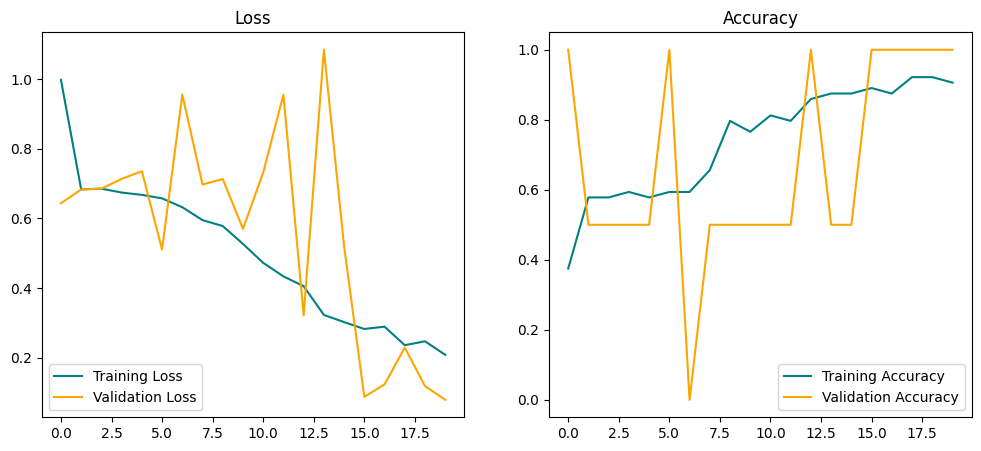

In [113]:
# 8. Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss', color='teal')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='teal')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.legend()

plt.show()

In [220]:
#Evaluating the model

In [114]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [115]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [116]:

for batch in val.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 175ms/step


In [117]:
print(f'Precision: {pre.result().numpy():.4f}')
print(f'Recall: {re.result().numpy():.4f}')
print(f'Accuracy: {acc.result().numpy():.4f}')

Precision: 0.0000
Recall: 0.0000
Accuracy: 1.0000


In [118]:
#Testing the model

In [119]:

import cv2


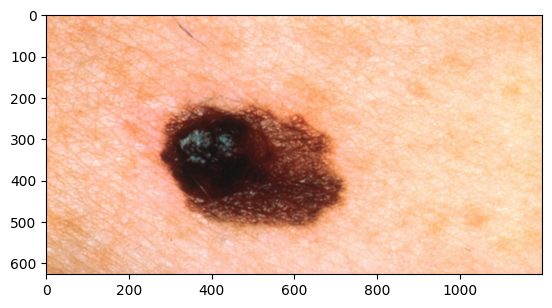

In [120]:
img = cv2.imread('data/malignant/asymmetry.jpg')
if img is not None:
	img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img_rgb)
	plt.show()
else:
	print("Image not found or unable to load.")

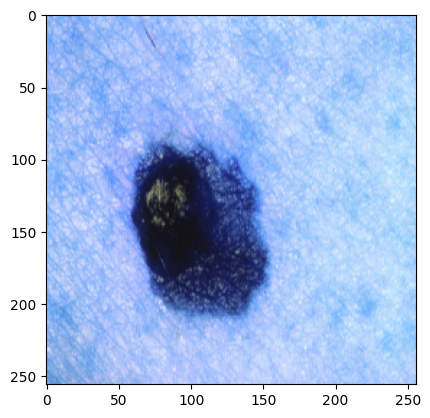

In [121]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [122]:

yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 43ms/step


In [123]:

yhat

array([[0.99987996]], dtype=float32)

In [124]:

if yhat > 0.5: 
    print(f'Predicted class is Malignant')
else:
    print(f'Predicted class is Benign')

Predicted class is Malignant


In [ ]:
#Save the model

In [125]:

%pip install tensorflow

from tensorflow.keras.models import load_model # type: ignore

Note: you may need to restart the kernel to use updated packages.


In [126]:

model.save(os.path.join('models','imageclassifier.h5'))

In [127]:

new_model = load_model('models/imageclassifier.h5')

In [128]:

new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


array([[0.99987996]], dtype=float32)